In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

**Use decision trees to prepare a model on fraud data** 
**treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [17]:
fraud=pd.read_csv('/content/Fraud_check.csv')

# EDA

In [18]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [22]:
fraud["income"]
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [23]:
fraud.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [24]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   income           600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [25]:
fraud.shape

(600, 7)

In [26]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
income             0
dtype: int64

***creating dummy cols for better understanding of the data***

In [28]:
fraud1=pd.get_dummies(fraud,columns=['Undergrad','Urban'],drop_first=True)

In [33]:
fraud1['Marital.Status']=fraud1['Marital.Status'].map({'Single':1,'Married':2,'Divorced':3})

In [35]:
fraud1['income']=fraud1['income'].map({'Good':1,"Risky":0})

In [36]:
fraud1.tail(15)

,Marital.Status,Taxable.Income,City.Population,Work.Experience,income,Undergrad_YES,Urban_YES
585,1,84557,137622,2,1,0,1
586,1,54126,106230,30,1,1,0
587,1,87685,154677,26,1,0,1
588,2,85076,93242,27,1,1,1
589,2,31633,30774,10,1,1,0
590,2,43018,85195,14,1,0,1
591,1,27394,132859,18,0,1,1
592,1,68152,75143,16,1,1,0
593,3,84775,131963,10,1,0,1
594,2,47364,97526,9,1,0,1


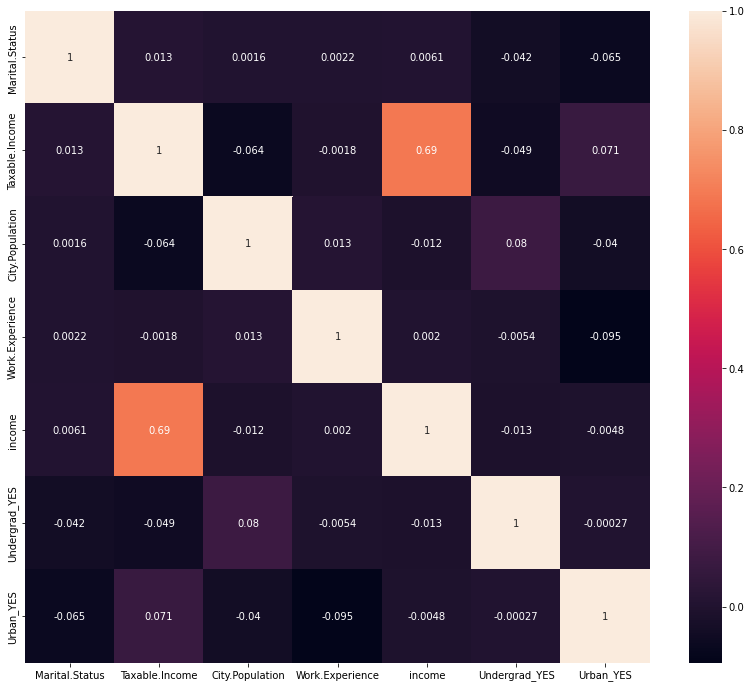

In [39]:
 plt.subplots(figsize=(14,12))
sns.heatmap(fraud1.corr(),annot=True)

In [57]:
wm=pd.crosstab(fraud1['Work.Experience'],fraud1['Marital.Status'])

In [43]:
wm

Marital.Status,1,2,3
Work.Experience,,,
0,3,5,6
1,5,3,6
2,8,6,5
3,6,5,3
4,3,3,8
5,9,10,3
6,8,4,7
7,13,5,3
8,2,6,6


<Figure size 1440x1584 with 0 Axes>

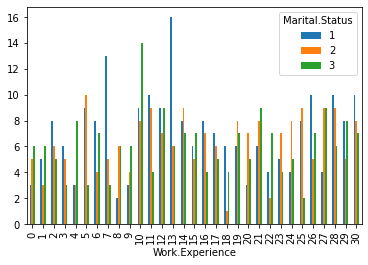

In [56]:
plt.figure(figsize=(20,22))
wm.plot(kind='bar')

In [68]:
wi=pd.crosstab(fraud1['Work.Experience'],fraud1['income'])

In [69]:
wi

income,0,1
Work.Experience,,
0,1,13
1,4,10
2,2,17
3,4,10
4,3,11
5,3,19
6,2,17
7,8,13
8,3,11


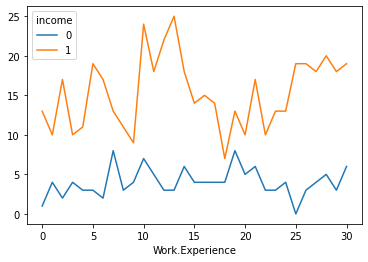

In [70]:
wi.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


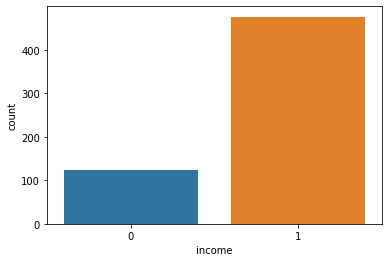

In [72]:
sns.countplot(fraud1['income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


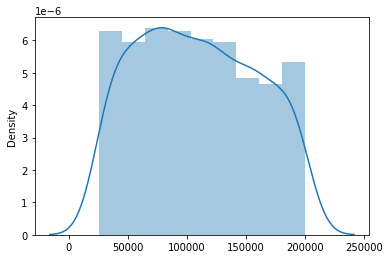

In [73]:
sns.distplot(x=fraud1['City.Population'])

In [74]:
x=fraud1.drop('income',axis=1)

In [75]:
x

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,1,68833,50047,10,0,1
1,3,33700,134075,18,1,1
2,2,36925,160205,30,0,1
3,1,50190,193264,15,1,1
4,2,81002,27533,28,0,0
...,...,...,...,...,...,...
595,3,76340,39492,7,1,1
596,3,69967,55369,2,1,1
597,3,47334,154058,0,0,1
598,2,98592,180083,17,1,0


In [76]:
y=fraud1['income']

In [77]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: income, Length: 600, dtype: int64

In [78]:
#TRAINING AND TESTING THE DATASET
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [79]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# **DECISION-TREE**

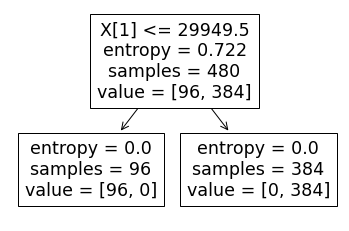

In [80]:
tree.plot_tree(model);

In [81]:
y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [82]:
fraud1.income.value_counts()

1    476
0    124
Name: income, dtype: int64

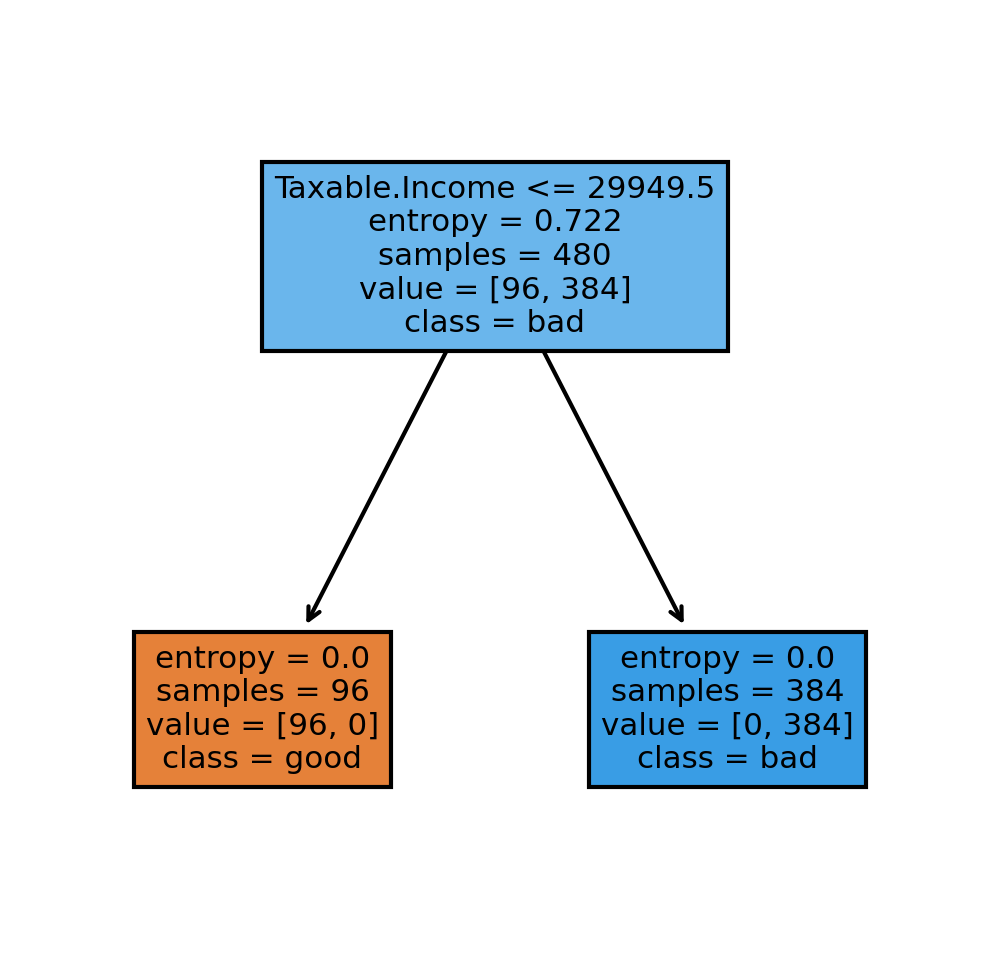

In [84]:
fn=fraud1.columns
cn=['good','bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

**CLASSIFICATION**

In [85]:
preds=model.predict(x_test)

In [86]:
pd.Series(preds).value_counts()

1    92
0    28
dtype: int64

In [87]:
preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [88]:
pd.crosstab(y_test,preds) 

col_0,0,1
income,,
0,28,0
1,0,92


In [89]:
#model accuracy
np.mean(preds==y_test)

1.0

**REGRESSION**

In [90]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [91]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [93]:
#Find-accuracy
model.score(x_test,y_test)

1.0